In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'D:\ASG_PRJ\Lab\Lab 1\WeatherForecast\Climate Data.csv')

print(data.head())
print(data.columns)

         Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                     36.8                     274.0             

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
 7   Average direction (°deg)  3902 non-null   float64
 8   Rainfall for month (in)   3902 non-null   float64
 9   Rainfall for year (in)    3902 non-null   float64
 10  Month                     3902 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 335.5+ KB


In [23]:
data.isnull().sum()

Date                        0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Month                       0
dtype: int64

In [25]:
data.columns

Index(['Date', 'Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Month'],
      dtype='object')

In [27]:
import sqlite3 
import csv
con = sqlite3.connect("weather.db")
cur = con.cursor()

In [47]:
import csv
import sqlite3

# Connect to the database
con = sqlite3.connect('weather_stock.db')
cur = con.cursor()

cur.execute('''DROP TABLE IF EXISTS WeatherInfo''')
cur.execute('''CREATE TABLE IF NOT EXISTS WeatherInfo (
    Date DATE,
    Average_temperature_F REAL,
    Average_humidity REAL,
    Average_dewpoint_F REAL,
    Average_barometer_in REAL,
    Average_windspeed_mph REAL,
    Average_gustspeed_mph REAL,
    Average_direction_deg REAL,
    Rainfall_for_month_in REAL,
    Rainfall_for_year_in REAL,
    Month TEXT,
    PRIMARY KEY (Date)
)''')

# Read data from CSV and insert into the table
with open('Climate data.csv', 'r') as file:
    dr = csv.DictReader(file)
    to_db = [(i['Date'],
              float(i.get('Average temperature (°F)', 0)),
              float(i.get('Average humidity (%)', 0)),
              float(i.get('Average dewpoint (°F)', 0)),
              float(i.get('Average barometer (in)', 0)),
              float(i.get('Average windspeed (mph)', 0)),
              float(i.get('Average gustspeed (mph)', 0)),
              float(i.get('Average direction (°deg)', 0)),
              float(i.get('Rainfall for month (in)', 0)),
              float(i.get('Rainfall for year (in)', 0)),
              i.get('Month', '')  
             ) for i in dr]

# Insert data into the table
cur.executemany('''INSERT INTO WeatherInfo (Date, Average_temperature_F, Average_humidity, Average_dewpoint_F, Average_barometer_in, 
                    Average_windspeed_mph, Average_gustspeed_mph, Average_direction_deg, Rainfall_for_month_in, 
                    Rainfall_for_year_in, Month)
                  VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);''', to_db)

con.commit()

def execute_and_print(query, description):
    print(f"\n{description}:")
    try:
        cur.execute(query)
        rows = cur.fetchall()
        if rows:
            for row in rows:
                print(row)
        else:
            print(0)
    except Exception as e:
        print(f"Error executing query: {e}")

execute_and_print('SELECT * FROM WeatherInfo LIMIT 5', 'First 5 rows of WeatherInfo')




First 5 rows of WeatherInfo:
('2009-01-01', 0.0, 35.0, 0.0, 29.7, 26.4, 36.8, 0.0, 0.0, 0.0, '01')
('2009-01-02', 0.0, 32.0, 0.0, 29.5, 12.8, 18.0, 0.0, 0.0, 0.0, '01')
('2009-01-03', 0.0, 60.0, 0.0, 29.7, 8.3, 12.2, 0.0, 0.0, 0.0, '01')
('2009-01-04', 0.0, 67.0, 0.0, 30.4, 2.9, 4.5, 0.0, 0.0, 0.0, '01')
('2009-01-05', 0.0, 30.0, 0.0, 29.9, 16.7, 23.1, 0.0, 0.0, 0.0, '01')


In [49]:
execute_and_print('''
    SELECT 
        MIN(Average_temperature_F) AS Min_Temperature,
        MAX(Average_temperature_F) AS Max_Temperature,
        AVG(Average_temperature_F) AS Avg_Temperature,
        MIN(Average_humidity) AS Min_Humidity,
        MAX(Average_humidity) AS Max_Humidity,
        AVG(Average_humidity) AS Avg_Humidity,
        MIN(Rainfall_for_month_in) AS Min_Rainfall_Month,
        MAX(Rainfall_for_month_in) AS Max_Rainfall_Month,
        SUM(Rainfall_for_year_in) AS Total_Rainfall_Year
    FROM WeatherInfo;
''', 'Summary of Weather Data')



Summary of Weather Data:
(0.0, 0.0, 0.0, 9.0, 94.0, 48.87801127626858, 0.0, 4.48, 21407.04)


In [51]:
execute_and_print('''
    SELECT 
        Month, 
        AVG(Average_temperature_F) AS Avg_Temperature_F, 
        AVG(Average_humidity) AS Avg_Humidity
    FROM WeatherInfo
    GROUP BY Month
    ORDER BY Avg_Temperature_F DESC;
''', 'Monthly Average Temperature and Humidity')



Monthly Average Temperature and Humidity:
('12', 0.0, 45.98939929328622)
('11', 0.0, 43.863777089783284)
('10', 0.0, 48.956011730205276)
('09', 0.0, 47.97173144876325)
('08', 0.0, 51.4633431085044)
('07', 0.0, 53.58895705521472)
('06', 0.0, 47.82913165266106)
('05', 0.0, 56.09792284866469)
('04', 0.0, 51.62928348909657)
('03', 0.0, 46.64150943396226)
('02', 0.0, 47.32343234323432)
('01', 0.0, 44.78590785907859)


In [53]:
execute_and_print('''
    SELECT Date, Average_temperature_F 
    FROM WeatherInfo
    ORDER BY Average_temperature_F DESC
    LIMIT 1;
''', 'Hottest Day')

execute_and_print('''
    SELECT Date, Average_temperature_F 
    FROM WeatherInfo
    ORDER BY Average_temperature_F ASC
    LIMIT 1;
''', 'Coldest Day')

execute_and_print('''
    SELECT Date, Rainfall_for_month_in 
    FROM WeatherInfo
    ORDER BY Rainfall_for_month_in DESC
    LIMIT 1;
''', 'Rainiest Day')



Hottest Day:
('2009-01-01', 0.0)

Coldest Day:
('2009-01-01', 0.0)

Rainiest Day:
('2012-07-30', 4.48)


In [55]:
execute_and_print('''
    SELECT 
        COUNT(CASE WHEN Rainfall_for_month_in > 0 THEN 1 END) AS Rainy_Months,
        COUNT(CASE WHEN Rainfall_for_month_in = 0 THEN 1 END) AS Dry_Months
    FROM WeatherInfo;
''', 'Count of Rainy vs Dry Months')



Count of Rainy vs Dry Months:
(3353, 549)


In [57]:
execute_and_print('''
    SELECT 
        Average_direction_deg,
        COUNT(*) AS Occurrences
    FROM WeatherInfo
    GROUP BY Average_direction_deg
    ORDER BY Occurrences DESC;
''', 'Wind Direction Distribution')

execute_and_print('''
    SELECT 
        Average_humidity,
        COUNT(*) AS Occurrences
    FROM WeatherInfo
    GROUP BY Average_humidity
    ORDER BY Occurrences DESC;
''', 'Humidity Distribution')



Wind Direction Distribution:
(0.0, 3902)

Humidity Distribution:
(51.0, 99)
(44.0, 94)
(39.0, 92)
(40.0, 91)
(37.0, 91)
(45.0, 89)
(47.0, 88)
(42.0, 87)
(43.0, 84)
(50.0, 83)
(48.0, 83)
(41.0, 81)
(56.0, 80)
(38.0, 80)
(36.0, 78)
(46.0, 77)
(55.0, 76)
(52.0, 75)
(49.0, 74)
(32.0, 73)
(57.0, 71)
(53.0, 71)
(34.0, 70)
(30.0, 70)
(54.0, 69)
(60.0, 66)
(35.0, 63)
(58.0, 62)
(59.0, 60)
(29.0, 59)
(63.0, 58)
(66.0, 57)
(31.0, 55)
(33.0, 54)
(28.0, 50)
(71.0, 48)
(62.0, 48)
(61.0, 48)
(69.0, 47)
(24.0, 45)
(26.0, 44)
(23.0, 44)
(65.0, 43)
(64.0, 43)
(27.0, 43)
(22.0, 41)
(25.0, 40)
(72.0, 38)
(68.0, 38)
(74.0, 37)
(73.0, 37)
(67.0, 37)
(70.0, 36)
(79.0, 34)
(75.0, 33)
(77.0, 32)
(21.0, 30)
(80.0, 27)
(76.0, 27)
(81.0, 26)
(19.0, 26)
(78.0, 24)
(83.0, 23)
(20.0, 23)
(18.0, 22)
(84.0, 21)
(82.0, 18)
(17.0, 18)
(89.0, 17)
(88.0, 16)
(87.0, 15)
(85.0, 15)
(16.0, 15)
(86.0, 13)
(90.0, 10)
(15.0, 9)
(91.0, 7)
(14.0, 7)
(13.0, 7)
(12.0, 6)
(92.0, 4)
(11.0, 4)
(9.0, 3)
(94.0, 1)
(93.0, 1)
(10.0, 1)


In [59]:
execute_and_print('''
    SELECT 
        AVG(Average_temperature_F) AS Avg_Temperature, 
        AVG(Average_humidity) AS Avg_Humidity 
    FROM WeatherInfo
    GROUP BY strftime('%Y-%m', Date);  -- Group by Year-Month
''', 'Average Temperature and Humidity by Month')



Average Temperature and Humidity by Month:
(0.0, 43.064516129032256)
(0.0, 41.5)
(0.0, 40.142857142857146)
(0.0, 56.766666666666666)
(0.0, 55.25806451612903)
(0.0, 57.63333333333333)
(0.0, 58.03225806451613)
(0.0, 50.225806451612904)
(0.0, 50.63333333333333)
(0.0, 56.58064516129032)
(0.0, 44.4)
(0.0, 47.54838709677419)
(0.0, 55.42857142857143)
(0.0, 52.29032258064516)
(0.0, 56.766666666666666)
(0.0, 57.06666666666667)
(0.0, 54.0)
(0.0, 53.7)
(0.0, 51.806451612903224)
(0.0, 34.55172413793103)
(0.0, 51.483870967741936)
(0.0, 44.166666666666664)
(0.0, 53.333333333333336)
(0.0, 46.0)
(0.0, 48.67857142857143)
(0.0, 51.666666666666664)
(0.0, 38.25)
(0.0, 55.354838709677416)
(0.0, 45.7)
(0.0, 51.27777777777778)
(0.0, 44.29032258064516)
(0.0, 41.0)
(0.0, 42.903225806451616)
(0.0, 42.310344827586206)
(0.0, 47.7)
(0.0, 38.32258064516129)
(0.0, 33.483870967741936)
(0.0, 43.56666666666667)
(0.0, 47.516129032258064)
(0.0, 33.46666666666667)
(0.0, 55.935483870967744)
(0.0, 48.87096774193548)
(0.0, 

In [61]:
execute_and_print('''
    SELECT Date, Rainfall_for_month_in 
    FROM WeatherInfo
    WHERE Rainfall_for_month_in > 2
    ORDER BY Rainfall_for_month_in DESC;
''', 'Days with Rainfall above 2 inches')



Days with Rainfall above 2 inches:
('2012-07-30', 4.48)
('2012-07-31', 4.48)
('2012-07-29', 4.4)
('2012-07-28', 4.3)
('2012-07-27', 4.14)
('2012-07-25', 4.06)
('2012-07-26', 4.06)
('2014-07-30', 4.0)
('2014-07-31', 4.0)
('2012-07-24', 3.98)
('2012-07-23', 3.82)
('2012-07-22', 3.79)
('2012-07-21', 3.71)
('2012-07-19', 3.69)
('2012-07-20', 3.69)
('2012-07-16', 3.54)
('2012-07-17', 3.54)
('2012-07-18', 3.54)
('2012-07-15', 3.5)
('2012-07-11', 3.32)
('2012-07-12', 3.32)
('2012-07-13', 3.32)
('2012-07-14', 3.32)
('2012-07-09', 3.31)
('2012-07-10', 3.31)
('2012-07-08', 3.3)
('2014-07-29', 3.08)
('2015-07-21', 3.08)
('2015-07-22', 3.08)
('2015-07-23', 3.08)
('2015-07-24', 3.08)
('2015-07-25', 3.08)
('2015-07-26', 3.08)
('2015-07-27', 3.08)
('2015-07-28', 3.08)
('2015-07-29', 3.08)
('2015-07-30', 3.08)
('2015-07-31', 3.08)
('2012-07-07', 3.0)
('2015-07-15', 2.93)
('2015-07-16', 2.93)
('2015-07-17', 2.93)
('2015-07-18', 2.93)
('2015-07-19', 2.93)
('2015-07-20', 2.93)
('2015-07-14', 2.92)
('201

            Average temperature (°F)  Average humidity (%)  \
Date                                                         
2009-01-01                      37.8                  35.0   
2009-01-02                      43.2                  32.0   
2009-01-03                      25.7                  60.0   
2009-01-04                       9.3                  67.0   
2009-01-05                      23.5                  30.0   

            Average dewpoint (°F)  Average barometer (in)  \
Date                                                        
2009-01-01                   12.7                    29.7   
2009-01-02                   14.7                    29.5   
2009-01-03                   12.7                    29.7   
2009-01-04                    0.1                    30.4   
2009-01-05                   -5.3                    29.9   

            Average windspeed (mph)  Average gustspeed (mph)  \
Date                                                           
2009-01-0

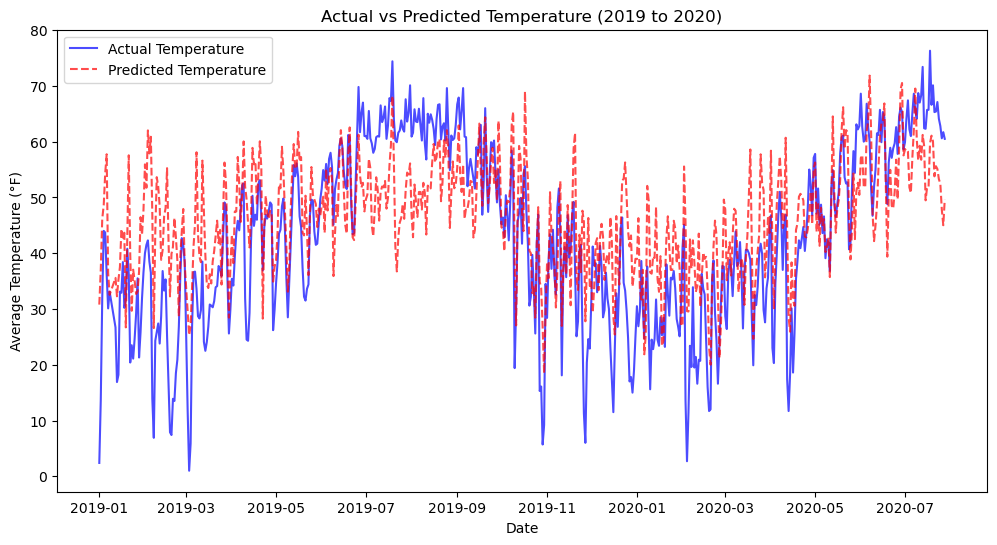

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

data = data.asfreq("D")

# Handling missing values (interpolating to fill gaps)
data.interpolate(method='linear', inplace=True)

print(data.head())

features = ['Average humidity (%)', 'Average barometer (in)', 'Average windspeed (mph)']
target = 'Average temperature (°F)'

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

start_date = '2019'
end_date = '2020'
data_sample = data.loc[start_date:end_date]

X_sample = data_sample[features]
X_sample_scaled = scaler.transform(X_sample)
y_sample = data_sample[target]
y_pred_sample = model.predict(X_sample_scaled)

plt.figure(figsize=(12, 6))
plt.plot(data_sample.index, y_sample, label="Actual Temperature", color='b', alpha=0.7)
plt.plot(data_sample.index, y_pred_sample, label="Predicted Temperature", color='r', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.title(f'Actual vs Predicted Temperature ({start_date} to {end_date})')
plt.legend()
plt.show()



<Figure size 1200x1000 with 0 Axes>

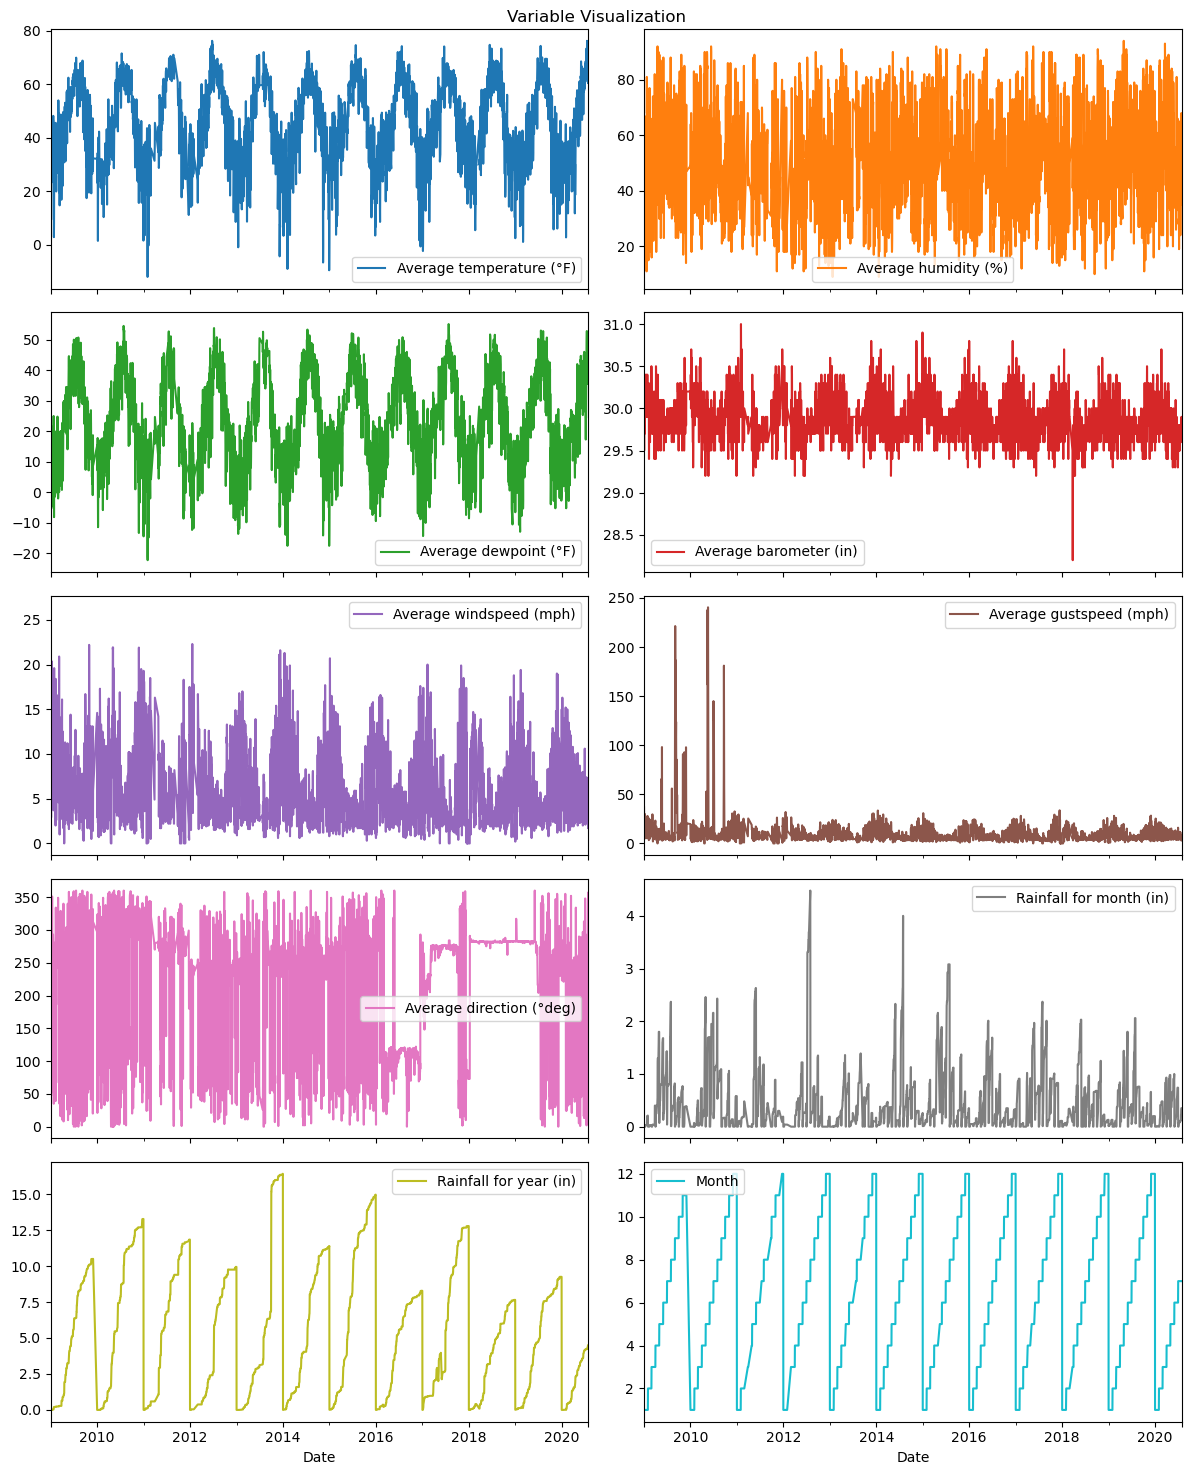

In [71]:
num_columns = data.shape[1]
nrows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 10))
data.plot(subplots=True, layout=(nrows, 2), figsize=(12, nrows*3), title="Variable Visualization")
plt.tight_layout()
plt.show()

In [23]:
print(weather_data.columns)

Index(['Date', 'Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Month'],
      dtype='object')
